In [1]:
import numpy as np
import matplotlib.pyplot as plt
from argparse import Namespace

In [2]:
rng = np.random.default_rng(1)

x = np.linspace(0, 1, 10)
ye = np.ones_like(x) * 0.2
y = rng.normal(2 * x + 1, ye)

data = Namespace(x=x, y=y, ye=ye)

In [6]:
!pip install iminuit

  Obtaining dependency information for iminuit from https://files.pythonhosted.org/packages/64/a4/4654fb9b0868e19f2a83adee346e70ef4517b7d6f58def6fc2845c419263/iminuit-2.24.0-cp39-cp39-win_amd64.whl.metadata
  Using cached iminuit-2.24.0-cp39-cp39-win_amd64.whl.metadata (11 kB)
Using cached iminuit-2.24.0-cp39-cp39-win_amd64.whl (341 kB)


DEPRECATION: legwork 0.4.5 has a non-standard dependency specifier numba>=0.50'. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of legwork or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: legwork 0.4.5 has a non-standard dependency specifier numpy>=1.16'. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of legwork or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: legwork 0.4.5 has a non-standard dependency specifier astropy>=4.0'. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of legwork or contact the author to suggest that they release a version with a conforming d

Text(0, 0.5, 'y')

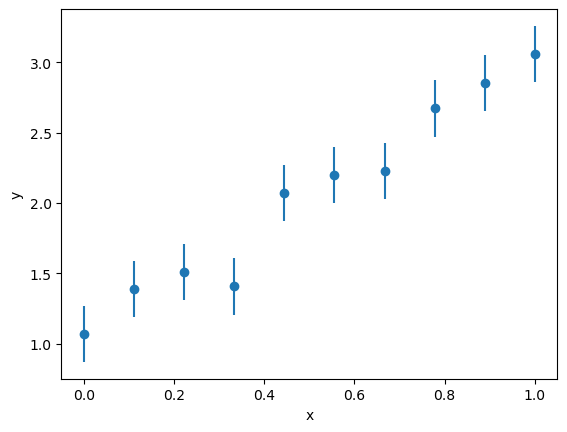

In [7]:
plt.errorbar(data.x, data.y, data.ye, fmt='o')
plt.xlabel('x')
plt.ylabel('y')

In [8]:
from iminuit import Minuit, cost

def model(x, a, b):
    return a + b * x

lsq = cost.LeastSquares(data.x, data.y, data.ye, model)

m = Minuit(lsq, a=0, b=0)
m

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,a,0.0,0.1,,,,,
1,b,0.0,0.1,,,,,


In [9]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.959 (χ²/ndof = 0.5)      │              Nfcn = 34               │
│ EDM = 2.65e-23 (Goal: 0.0002)    │            time = 4.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.05    │   0.12    │            │            │         │         │       │
│ 1 │ b    │   1.99    │   0.20    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────┐
│   │      a      b │
├───┼───────────────┤
│ a │ 0.0138 -0.020 │
│ b │ -0.020 0.0393 │
└───┴───────────────┘

In [10]:
m.fmin

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.959 (χ²/ndof = 0.5)      │              Nfcn = 34               │
│ EDM = 2.65e-23 (Goal: 0.0002)    │            time = 4.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘

In [11]:
m.covariance

,a,b
a,0.0138,-0.020 (-0.843)
b,-0.020 (-0.843),0.0393


In [12]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.959 (χ²/ndof = 0.5)      │              Nfcn = 60               │
│ EDM = 2.65e-23 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.05    │   0.12    │   -0.12    │    0.12    │         │         │       │
│ 1 │ b    │   1.99    │   0.20    │   -0.20    │    0.20    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.12   │   0.12    │   -0.2    │    0.2    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬───────────────┐
│   │      a      b │
├───┼───────────────┤
│ a │ 0.0138 -0.020 │
│ b │ -0.020 0.0393 │
└───┴───────────────┘

In [13]:
me = m.merrors['a']
me.name, me.is_valid, me.lower, me.upper

('a', True, -0.11755076272896135, 0.11755076272914197)

Text(0, 0.5, 'y')

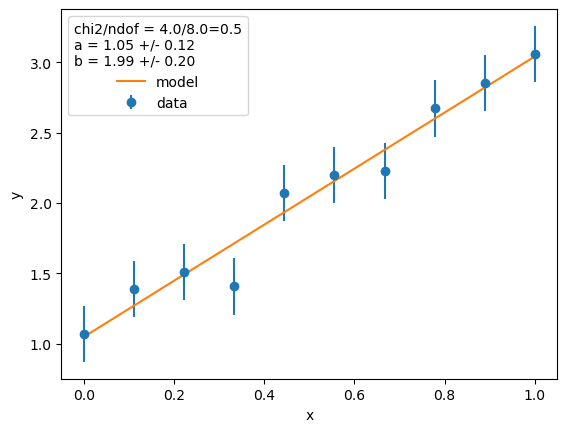

In [14]:
plt.errorbar(data.x, data.y, data.ye, fmt='o', label='data')
plt.plot(data.x, model(data.x, *m.values[:]), label='model')

chi2 = m.fval
ndof = m.ndof

title = [
    f"chi2/ndof = {chi2:.1f}/{ndof}={chi2/ndof:.1f}",
]

for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )
    
plt.legend(title="\n".join(title))
plt.xlabel("x")
plt.ylabel("y")

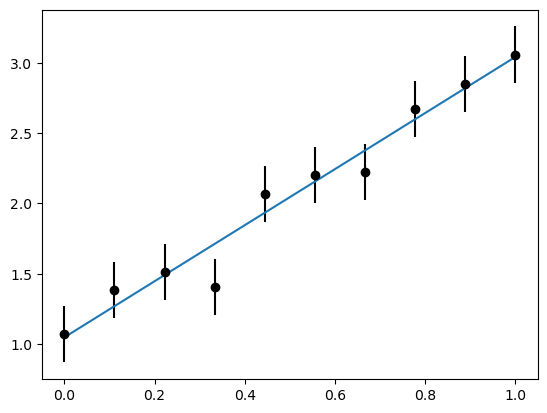

In [15]:
lsq.visualize(m.values)

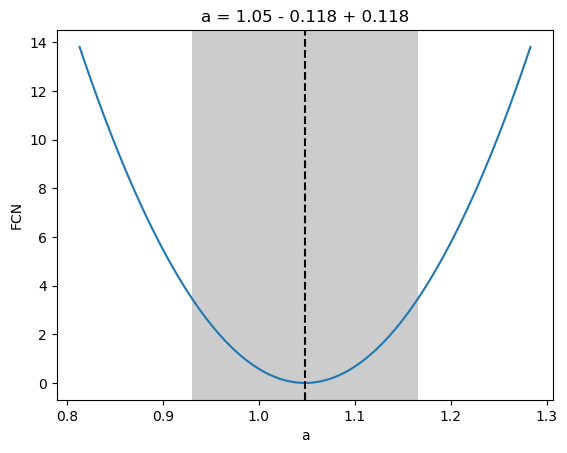

In [16]:
m.draw_profile("a");

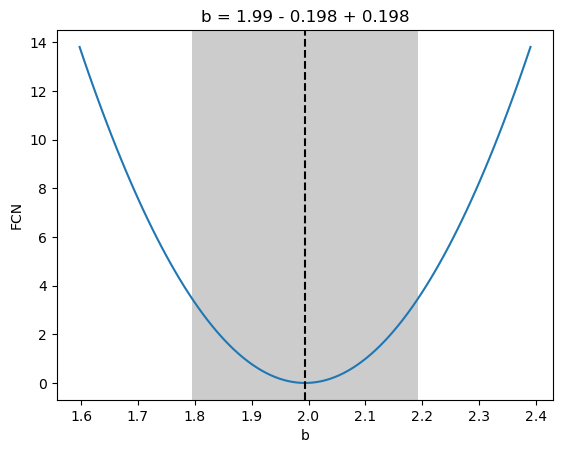

In [17]:
m.draw_profile('b');

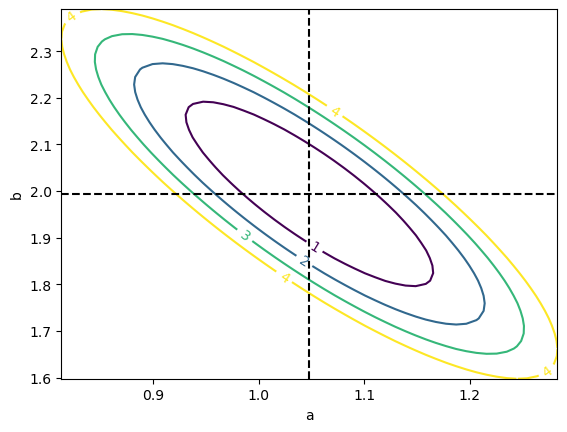

In [18]:
m.draw_contour('a','b');

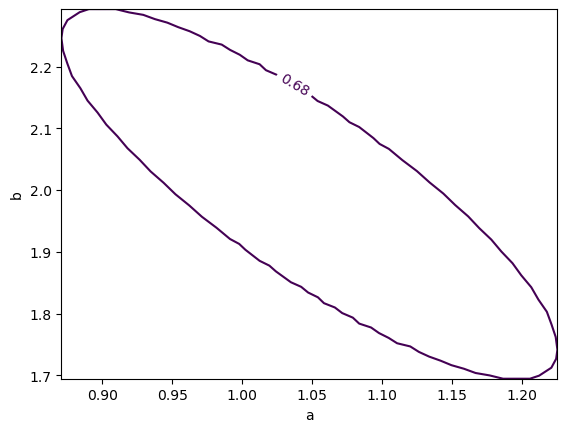

In [19]:
m.draw_mncontour('a','b');

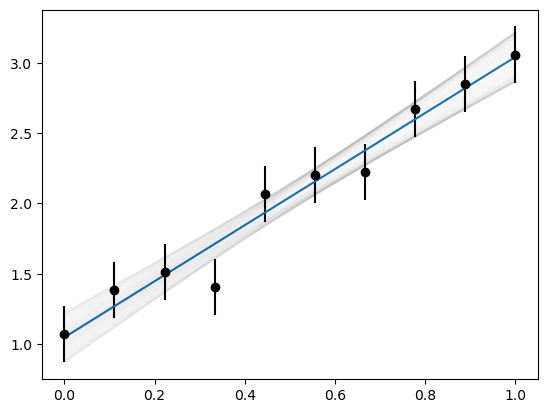

In [20]:
lsq.visualize(m.values)

ab = m.mncontour('a','b')
for a,b in ab:
    plt.plot(data.x, model(data.x,a ,b), color='k', alpha=0.01)

In [22]:
!pip install jacobi

  Obtaining dependency information for jacobi from https://files.pythonhosted.org/packages/b0/5c/2d6a44da539db44820b1c053958bfc4ee011e33f4f110175bfc712520440/jacobi-0.9.2-py3-none-any.whl.metadata
  Using cached jacobi-0.9.2-py3-none-any.whl.metadata (6.3 kB)
Using cached jacobi-0.9.2-py3-none-any.whl (11 kB)


DEPRECATION: legwork 0.4.5 has a non-standard dependency specifier numba>=0.50'. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of legwork or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: legwork 0.4.5 has a non-standard dependency specifier numpy>=1.16'. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of legwork or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: legwork 0.4.5 has a non-standard dependency specifier astropy>=4.0'. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of legwork or contact the author to suggest that they release a version with a conforming d

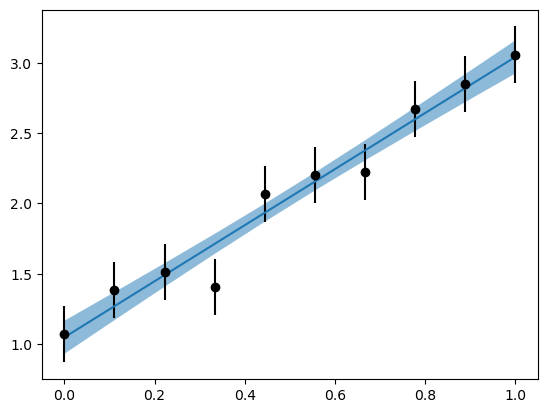

In [23]:
import jacobi

lsq.visualize(m.values)

y, ycov = jacobi.propagate(lambda p: model(x, *p), m.values, m.covariance)
ye = np.diag(ycov) ** 0.5

plt.fill_between(x, y-ye, y+ye, alpha=0.5)

In [27]:
m.interactive()